# Comparative Analysis of Brain MRI Segmentation Software (FSL and Synthseg)
## Metrics Evaluation and Age-Volume Prediction using Machine Learning

**Contributers: Jonathan Williams, Eddy Rosales, and Jesse Maki**

---

*Contents of this notebook*



1.   Data Preprocess and Volume Calculations
2.   Basic Statistical Measures and EDA Analysis for the IXI Dataset
  * 5 number summary for age
  * Distribution graphs for age, height, weight, GM_VOLUME, WM_MATTER, CSF_VOLUME, TBV, IBV, ethnicity, and gender
  * Scatter plots of all 5 volume measures and age
  * Box plots of WM_VOLUME, GM_VOLUME, and CSF_VOLUME
  * Scatter plots of total brain volume by age for SythnSeg and FSL
3. Machine Learning Models and Predictions Graphs
  * Linear Regression
  * Random Forest Regression
  * XGBRegressor
  * LGBMRegressor
  * 3D CNN






## Import Modules & Libraries

In [ ]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

## Preprocessing - Volume Calculations

Volumes were calculated by data processing pipeline to calculate white matter volumes from brain imaging data in the Probabilistic Voxel-based Analysis (PVE) format. It extracts subject IDs, processes PVE data, and computes the volumes for each subject. The calculated volumes are then integrated into an existing CSV file for further analysis and exploration.

**White Matter Calculations**

In [ ]:
# Imports
import os
import numpy as np
import nibabel as nib
import csv

# Set data directory
data_directory = 'PVE/0'

# Get list of subject IDs
all_files = os.listdir(data_directory)
subject_list = [filename.replace('.nii_seg_pve_0.nii.gz', '') for filename in all_files if filename.endswith('.nii_seg_pve_0.nii.gz')]

# Function to extract numeric ID
def extract_numeric_id(subject_id):
    return int(''.join(filter(str.isdigit, subject_id)))

# Calculate white matter volumes
wm_volumes = []
for subject in subject_list:
    pve_file_wm = os.path.join(data_directory, f'{subject}.nii_seg_pve_0.nii.gz')

    # Load white matter PVE file
    pve_data_wm = nib.load(pve_file_wm).get_fdata()

    # Calculate white matter volume
    wm_volume = np.sum(pve_data_wm)

    # Append to list
    wm_volumes.append(wm_volume)

# Read CSV file
csv_file_path = 'IXI-FSL.csv'
csv_data = []

with open(csv_file_path, 'r') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for row in csv_reader:
        csv_data.append(row)

# Add volumes to CSV
for i, subject_id in enumerate(subject_list):
    numeric_subject_id = extract_numeric_id(subject_id)

    for row in csv_data:
        if 'IXI_ID' in row and int(row['IXI_ID']) == numeric_subject_id:
            row['WM_VOLUME'] = wm_volumes[i]
            break

# Write updated CSV
with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = list(csv_data[0].keys())
    if 'WM_VOLUME' not in fieldnames:
        fieldnames.append('WM_VOLUME')

    csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    csv_writer.writeheader()
    csv_writer.writerows(csv_data)

print("White Matter volumes added to the CSV file.")

White Matter volumes added to the CSV file.


**Gray Matter Calculations**

In [ ]:
# Imports
import os
import numpy as np
import nibabel as nib
import csv

# Set data directory
data_directory = 'PVE/1'

# Get list of subject IDs
all_files = os.listdir(data_directory)
subject_list = [filename.replace('.nii_seg_pve_1.nii.gz', '') for filename in all_files if filename.endswith('.nii_seg_pve_1.nii.gz')]

# Function to extract numeric ID
def extract_numeric_id(subject_id):
    return int(''.join(filter(str.isdigit, subject_id)))

# Calculate gray matter volumes
gm_volumes = []
for subject in subject_list:
    pve_file_gm = os.path.join(data_directory, f'{subject}.nii_seg_pve_1.nii.gz')

    # Load gray matter PVE file
    pve_data_gm = nib.load(pve_file_gm).get_fdata()

    # Calculate gray matter volume
    gm_volume = np.sum(pve_data_gm)

    # Append to list
    gm_volumes.append(gm_volume)

# Read CSV file
csv_file_path = 'IXI-FSL.csv'
csv_data = []

with open(csv_file_path, 'r') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for row in csv_reader:
        csv_data.append(row)

# Add volumes to CSV
for i, subject_id in enumerate(subject_list):
    numeric_subject_id = extract_numeric_id(subject_id)

    for row in csv_data:
        if 'IXI_ID' in row and int(row['IXI_ID']) == numeric_subject_id:
            row['GM_VOLUME'] = gm_volumes[i]
            break

# Write updated CSV
with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = list(csv_data[0].keys())
    if 'GM_VOLUME' not in fieldnames:
        fieldnames.append('GM_VOLUME')

    csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    csv_writer.writeheader()
    csv_writer.writerows(csv_data)

print("Gray Matter volumes added to the CSV file.")

Gray Matter volumes added to the CSV file.


**Cerebrospinal Fluid Calculations**

In [ ]:
# Imports
import os
import numpy as np
import nibabel as nib
import csv

# Set data directory
data_directory = 'PVE/2'

# Get list of subject IDs
all_files = os.listdir(data_directory)
subject_list = [filename.replace('.nii_seg_pve_2.nii.gz', '') for filename in all_files if filename.endswith('.nii_seg_pve_2.nii.gz')]

# Function to extract numeric ID
def extract_numeric_id(subject_id):
    return int(''.join(filter(str.isdigit, subject_id)))

# Calculate CSF volumes
csf_volumes = []
for subject in subject_list:
    pve_file_csf = os.path.join(data_directory, f'{subject}.nii_seg_pve_2.nii.gz')

    # Load CSF PVE file
    pve_data_csf = nib.load(pve_file_csf).get_fdata()

    # Calculate CSF volume
    csf_volume = np.sum(pve_data_csf)

    # Append to list
    csf_volumes.append(csf_volume)

# Read CSV file
csv_file_path = 'IXI-FSL.csv'
csv_data = []

with open(csv_file_path, 'r') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for row in csv_reader:
        csv_data.append(row)

# Add volumes to CSV
for i, subject_id in enumerate(subject_list):
    numeric_subject_id = extract_numeric_id(subject_id)

    for row in csv_data:
        if 'IXI_ID' in row and int(row['IXI_ID']) == numeric_subject_id:
            row['CSF_VOLUME'] = csf_volumes[i]
            break

# Write updated CSV
with open(csv_file_path, 'w', newline='') as csvfile:
    fieldnames = list(csv_data[0].keys())
    if 'CSF_VOLUME' not in fieldnames:
        fieldnames.append('CSF_VOLUME')

    csv_writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    csv_writer.writeheader()
    csv_writer.writerows(csv_data)

print("CSF volumes added to the CSV file.")

CSF volumes added to the CSV file.


## Basic Statistics and EDA Analysis of IXI Dataset

The IXI dataset in use is compromised of ≈600 subjects of T1 weighted MRI Images.

**Contents of IXI.csv**

In [ ]:
df = pd.read_csv('IXI.csv')
print(df.head(5))

   IXI_ID  SEX_ID (1=m, 2=f)  HEIGHT  WEIGHT  ETHNIC_ID  MARITAL_ID   
0       2                  2     164      58          1           4  \
1      12                  1     175      70          1           2   
2      13                  1     182      70          1           2   
3      14                  2     163      65          1           4   
4      15                  1     181      90          2           1   

   OCCUPATION_ID  QUALIFICATION_ID         DOB  DATE_AVAILABLE  STUDY_DATE   
0              1                 5  1970-01-30               1  2005-11-18  \
1              1                 5  1966-08-20               1  2005-06-01   
2              1                 5  1958-09-15               1  2005-06-01   
3              1                 5  1971-03-15               1  2005-06-09   
4              6                 5  1981-03-11               1  2005-06-23   

     AGE  
0  35.80  
1  38.78  
2  46.71  
3  34.24  
4  24.28  


**5 number summary of ages from IXI.csv**

In [ ]:
df = pd.read_csv('IXI.csv')

mean_age = df['AGE'].mean()
median_age = df['AGE'].median()
mode_age = df['AGE'].mode()[0]
min_age = df['AGE'].min()
max_age = df['AGE'].max()
std_dev_age = df['AGE'].std()

print(f"Mean Age: {mean_age}")
print(f"Median Age: {median_age}")
print(f"Mode of Age: {mode_age}")
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")
print(f"Age Standard Deviation: {std_dev_age}")


Mean Age: 49.41638983050848
Median Age: 50.61
Mode of Age: 53.41
Minimum Age: 19.98
Maximum Age: 86.32
Age Standard Deviation: 16.715461362894818


**Demographic Distribution of IXI.csv**

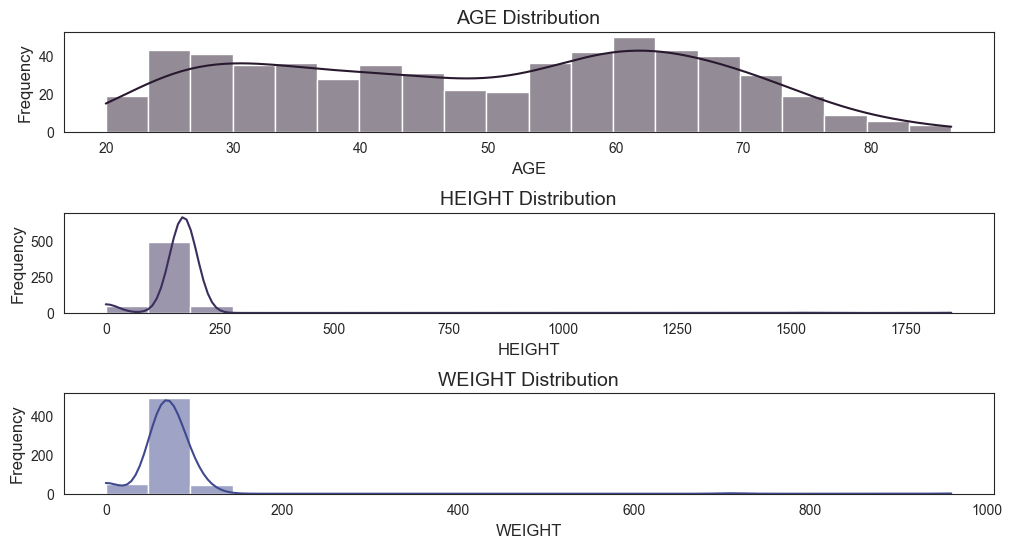

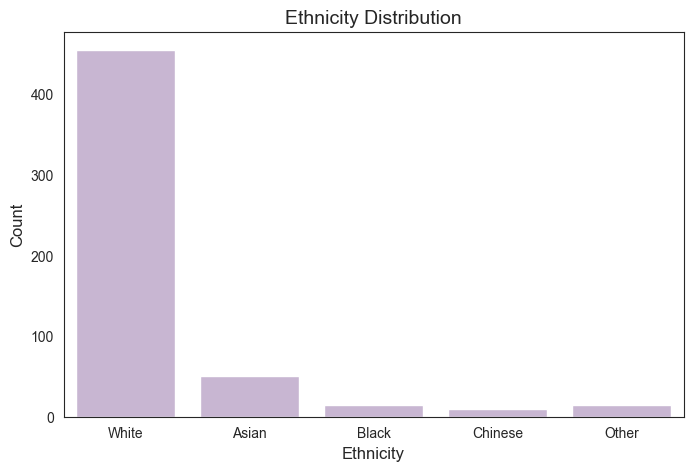

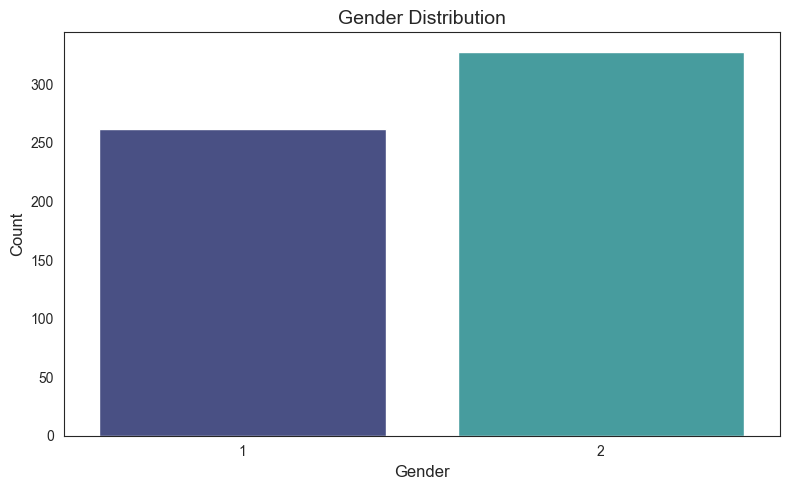

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('IXI.csv')

# Set seaborn style
sns.set_style("white")

# Color palette
palette = {"AGE": sns.color_palette("mako", 8)[0],
           "HEIGHT": sns.color_palette("mako", 8)[1],
           "WEIGHT": sns.color_palette("mako", 8)[2],
           "ETHNIC_ID": sns.color_palette("Paired", 12)[8]}

# Variables for histograms
hist_vars = ['AGE', 'HEIGHT', 'WEIGHT']

# Create histograms
fig = plt.figure(figsize=(12, 2 * len(hist_vars)))

for i, var in enumerate(hist_vars, 1):
    plt.subplot(len(hist_vars), 1, i)
    sns.histplot(df[var], bins=20, kde=True, color=palette[var])

    plt.title(f'{var} Distribution', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)


# Add spacing between plots
plt.subplots_adjust(hspace=0.8)

# Map ethnicity ids to labels
ethnic_labels = {1: 'White', 4: 'Black', 3: 'Asian',
                 6: 'Chinese', 5: 'Other'}
df['ETHNIC_ID'] = df['ETHNIC_ID'].map(ethnic_labels)

# Ethnicity bar plot
eth_fig = plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='ETHNIC_ID', color=palette['ETHNIC_ID'])

plt.title('Ethnicity Distribution', fontsize=14)
plt.xlabel('Ethnicity', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Gender bar plot
sex_fig = plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='SEX_ID', palette=sns.color_palette("mako", 2))

plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Tight layout
plt.tight_layout()

# Show plots
plt.show()


## Volume vs Age Correlations of FSL segmented MRI scans (IXI-FSL.csv) and SegSynth segemented MRI scans (IXI-SEG.csv)

**Scatter plots of IXI-FSL.csv**

WM Correlation: 0.47
GM Correlation: -0.21
CSF Correlation: -0.10


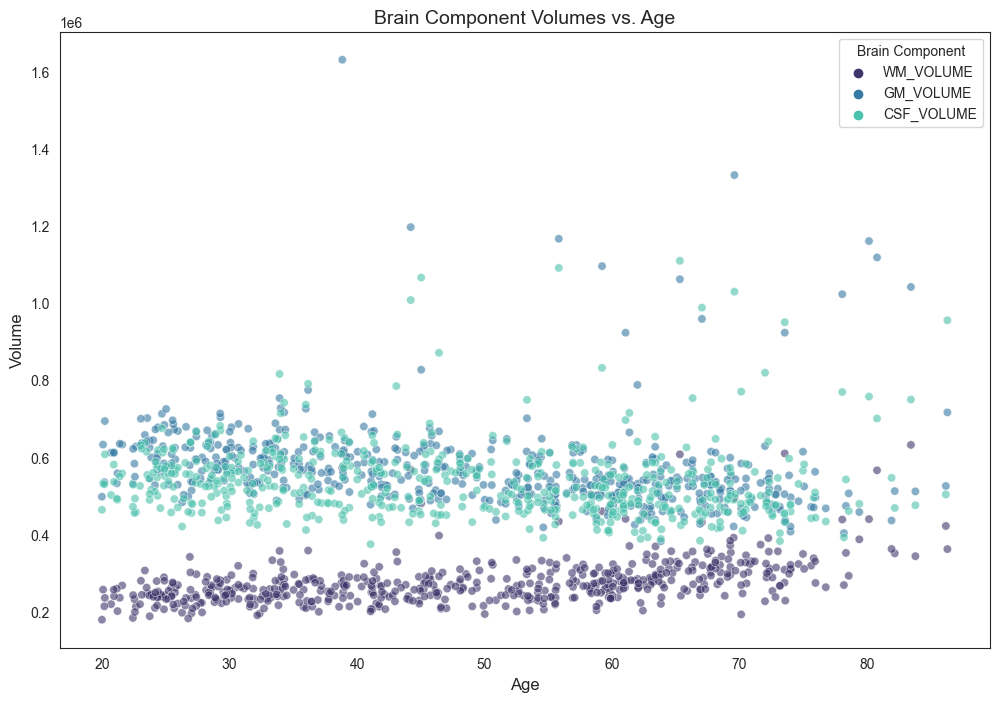

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
brain_vol_df = pd.read_csv('IXI-FSL.csv')

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Melt for easy plotting
melted_df = brain_vol_df.melt(
    id_vars='AGE',
    value_vars=['WM_VOLUME', 'GM_VOLUME', 'CSF_VOLUME'],
    var_name='Brain Component',
    value_name='Volume')

# Color palette
palette = {
    "WM_VOLUME": sns.color_palette("mako", 3)[0],
    "GM_VOLUME": sns.color_palette("mako", 3)[1],
    "CSF_VOLUME": sns.color_palette("mako", 3)[2]}

# Plot
sns.scatterplot(data=melted_df, x='AGE', y='Volume',
                hue='Brain Component', palette=palette, ax=ax, alpha=0.6)

# Axis labels and title
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Volume', fontsize=12)
ax.set_title('Brain Component Volumes vs. Age', fontsize=14)

# Calculate correlations
wm_corr = brain_vol_df['AGE'].corr(brain_vol_df['WM_VOLUME'])
gm_corr = brain_vol_df['AGE'].corr(brain_vol_df['GM_VOLUME'])
csf_corr = brain_vol_df['AGE'].corr(brain_vol_df['CSF_VOLUME'])

# Print correlations
print(f'WM Correlation: {wm_corr:.2f}')
print(f'GM Correlation: {gm_corr:.2f}')
print(f'CSF Correlation: {csf_corr:.2f}')

plt.show()


**Box plots of IXI-FSL.csv**

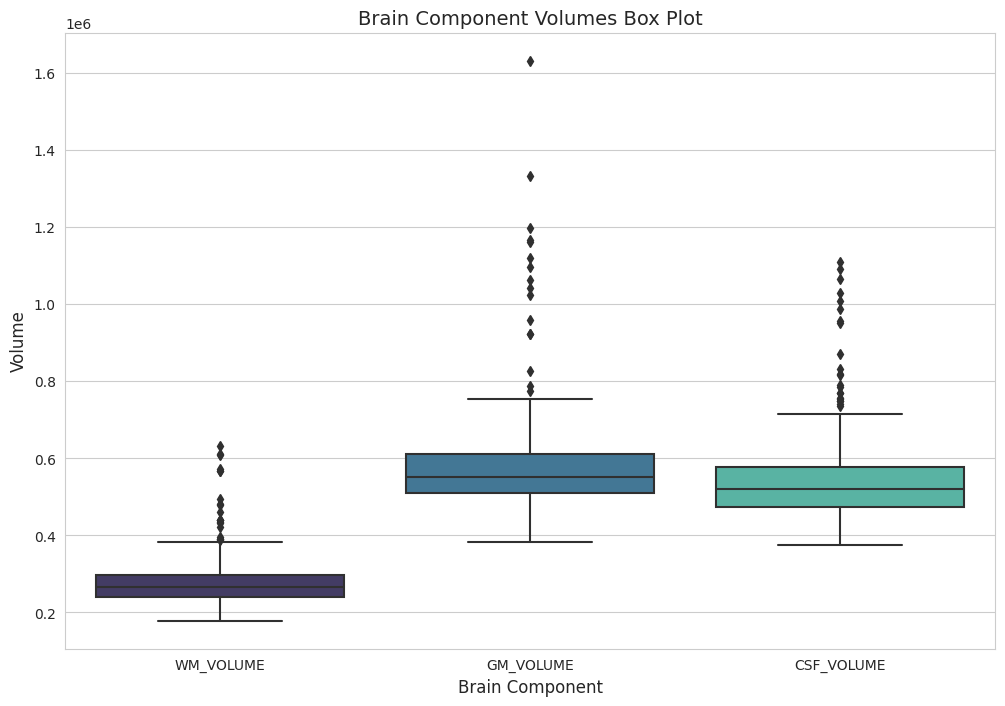

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
brain_vol_df = pd.read_csv('IXI-FSL-Cleaned.csv')

# Set seaborn style
sns.set_style("whitegrid")

# Melt for easy plotting
melted_df = brain_vol_df.melt(
    value_vars=['WM_VOLUME', 'GM_VOLUME', 'CSF_VOLUME'],
    var_name='Brain Component',
    value_name='Volume')

# Color palette
palette = {
    "WM_VOLUME": sns.color_palette("mako", 3)[0],
    "GM_VOLUME": sns.color_palette("mako", 3)[1],
    "CSF_VOLUME": sns.color_palette("mako", 3)[2]}

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate box plots
sns.boxplot(data=melted_df, x='Brain Component', y='Volume',
            palette=palette, ax=ax)

# Add axis labels and title
ax.set_xlabel('Brain Component', fontsize=12)
ax.set_ylabel('Volume', fontsize=12)
ax.set_title('Brain Component Volumes Box Plot', fontsize=14)

# Display plot
plt.show()

**Comparative Notes**

/var/folders/3c/fc0rqqx51m3ffry__byxf9vm0000gn/T/ipykernel_41723/3383884120.py:19: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(seg_age_tbv['AGE'], seg_age_tbv['TBV'], label='SEG', alpha=0.7, marker='x', edgecolors='r', s=80)


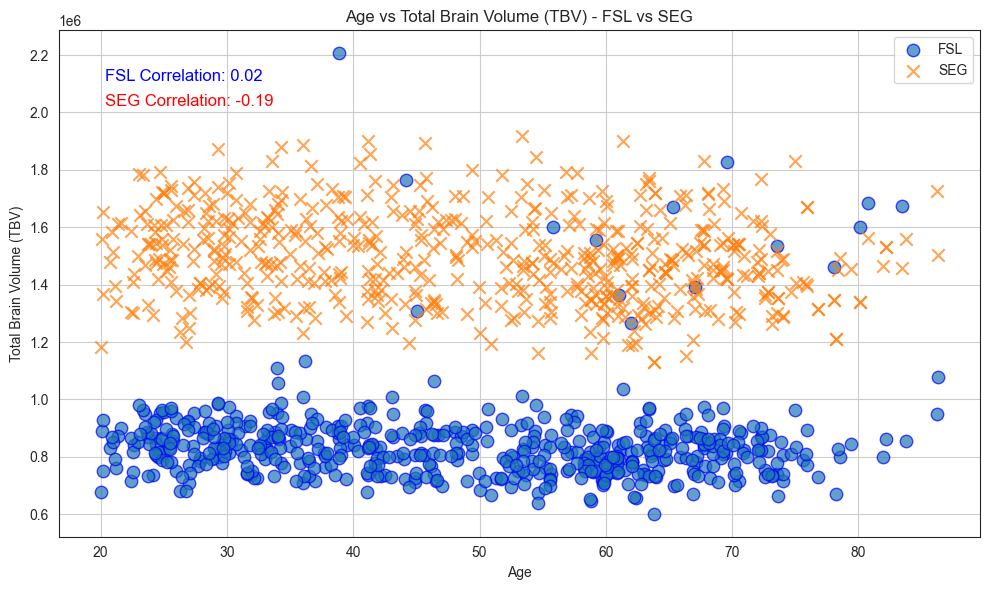

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
fsl_data = pd.read_csv('IXI-FSL.csv')
seg_data = pd.read_csv('IXI-SEG.csv')

# Extract necessary columns for plotting
fsl_age_tbv = fsl_data[['AGE', 'TBV']]
seg_age_tbv = seg_data[['AGE', 'TBV']]

# Calculate correlation coefficients
fsl_correlation = fsl_age_tbv['AGE'].corr(fsl_age_tbv['TBV'])
seg_correlation = seg_age_tbv['AGE'].corr(seg_age_tbv['TBV'])

# Plot the data with different markers for FSL and SEG
plt.figure(figsize=(10, 6))
plt.scatter(fsl_age_tbv['AGE'], fsl_age_tbv['TBV'], label='FSL', alpha=0.7, marker='o', edgecolors='b', s=80)
plt.scatter(seg_age_tbv['AGE'], seg_age_tbv['TBV'], label='SEG', alpha=0.7, marker='x', edgecolors='r', s=80)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Total Brain Volume (TBV)')
plt.title('Age vs Total Brain Volume (TBV) - FSL vs SEG')

# Display correlation coefficients on the plot
plt.annotate(f'FSL Correlation: {fsl_correlation:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='b')
plt.annotate(f'SEG Correlation: {seg_correlation:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='r')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This analysis highlights variations in volume calculations between the FSL and SynthSeg models on the same subjects. The FSL module exhibits some outliers, which contribute to its lower volume correlation. The SynthSeg model has a correlation of -0.19, which is expected due to white matter decreasing as age increases

/var/folders/3c/fc0rqqx51m3ffry__byxf9vm0000gn/T/ipykernel_41723/3310094295.py:27: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(seg_age_tbv['AGE'], seg_age_tbv['TBV'], label='SEG', alpha=0.7, marker='x', edgecolors='r', s=80)


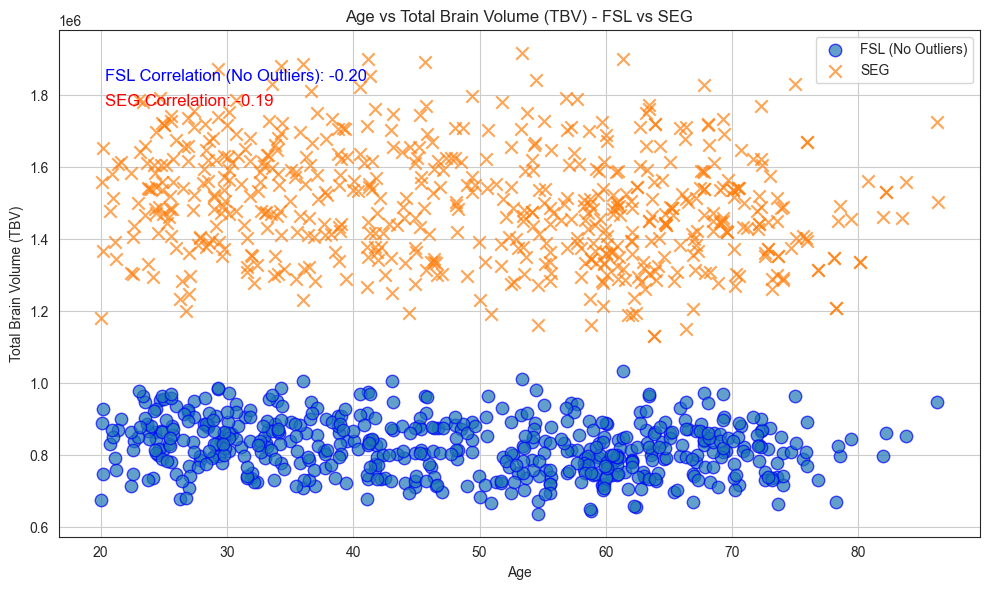

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files
fsl_data = pd.read_csv('IXI-FSL.csv')
seg_data = pd.read_csv('IXI-SEG.csv')

# Extract necessary columns for plotting
fsl_age_tbv = fsl_data[['AGE', 'TBV']]
seg_age_tbv = seg_data[['AGE', 'TBV']]

# Remove outliers from FSL data using IQR method
Q1 = fsl_age_tbv['TBV'].quantile(0.25)
Q3 = fsl_age_tbv['TBV'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
fsl_age_tbv_no_outliers = fsl_age_tbv[(fsl_age_tbv['TBV'] >= lower_bound) & (fsl_age_tbv['TBV'] <= upper_bound)]

# Calculate correlation coefficients
fsl_correlation = fsl_age_tbv_no_outliers['AGE'].corr(fsl_age_tbv_no_outliers['TBV'])
seg_correlation = seg_age_tbv['AGE'].corr(seg_age_tbv['TBV'])

# Plot the data with different markers for FSL and SEG
plt.figure(figsize=(10, 6))
plt.scatter(fsl_age_tbv_no_outliers['AGE'], fsl_age_tbv_no_outliers['TBV'], label='FSL (No Outliers)', alpha=0.7, marker='o', edgecolors='b', s=80)
plt.scatter(seg_age_tbv['AGE'], seg_age_tbv['TBV'], label='SEG', alpha=0.7, marker='x', edgecolors='r', s=80)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Total Brain Volume (TBV)')
plt.title('Age vs Total Brain Volume (TBV) - FSL vs SEG')

# Display correlation coefficients on the plot
plt.annotate(f'FSL Correlation (No Outliers): {fsl_correlation:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='b')
plt.annotate(f'SEG Correlation: {seg_correlation:.2f}', xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='r')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


From removing the outliers in the IXI-FSL.csv, we observe that the two correlations practically match eachother at -0.20 where SEG is at-0.19.

## Machine Learning Predictions

In this study, five machine learning models were tested to predict brain volumes using age and different brain metrics. The models included Linear Regression, Random Forest Regression, Extreme Gradient Boosting Regression (XGBRegressor), Light Gradient Boosting Machine Regressor (LGBMRegressor), and a 3D CNN model designed for FSL images. Linear Regression establishes a linear relationship, while Random Forest and XGBoost use ensemble techniques to handle non-linearities and improve accuracy. LGBMRegressor is a faster variant of gradient boosting, and the 3D CNN captures spatial information from FSL images.

The model uses two metrics to measure the accruacy of predictions:

1. Mean Absolute Error: $MAE = \frac{1}{n} \cdot Σ |yᵢ - ȳ|$ reflects how closely the model predicts ages are to the actual ages on average
<br>
<br>
2. $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{i} - \hat{y}{i})^{2}}{\sum{i=1}^{n} (y_{i} - \bar{y})^{2}}$ provides insight into how well the model captures the variance in age based on the provided volumes

### **Linear Regression, Random Forest Regression, XGBRegressor, and LGBMRegressor on IXI-FSL volumes**

The code loads the data, preprocesses it, performs train/test split, and standardizes the features. It then trains each model, evaluates its performance using R-squared and Mean Absolute Error, and plots the true age against the predicted age. The output shows how well each model predicts age using brain volume data.

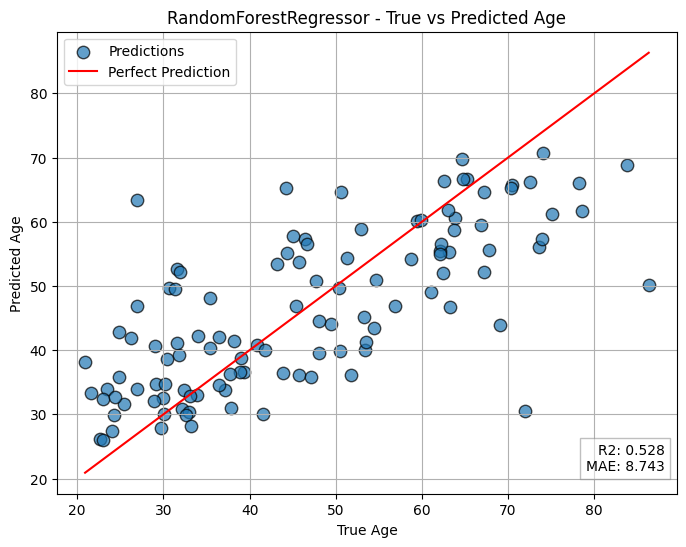

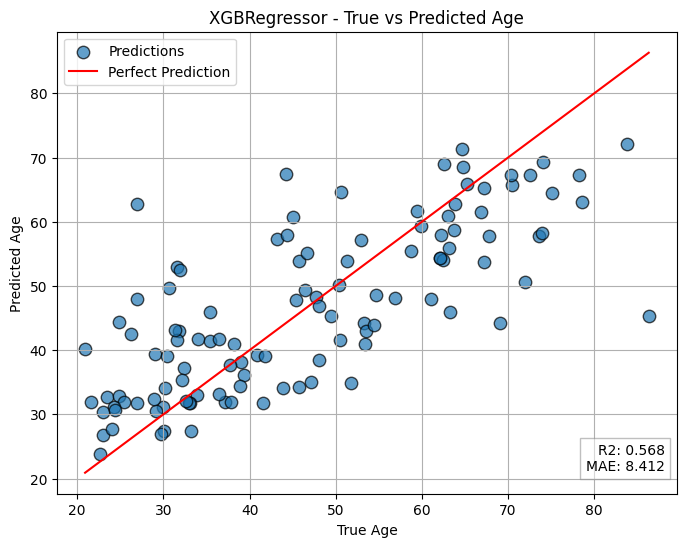

[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 3
[LightGBM] [Info] Start training from score 49.201978
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

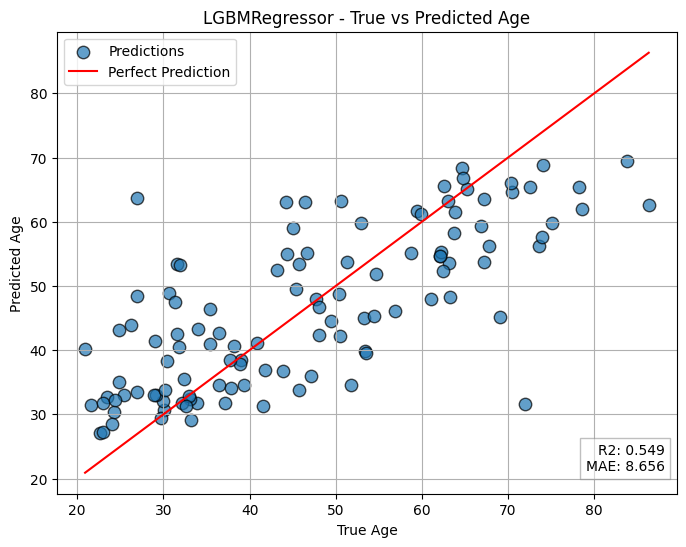

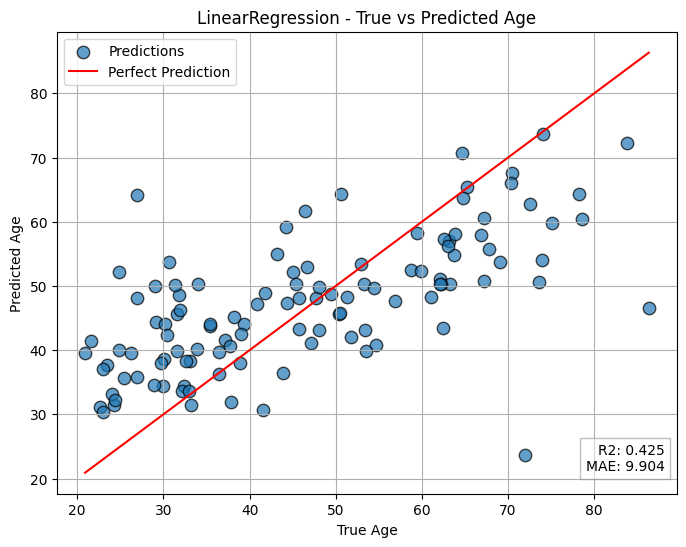


Ranking of models:
1. XGBRegressor: R2 = 0.568, MAE = 8.412
2. LGBMRegressor: R2 = 0.549, MAE = 8.656
3. RandomForestRegressor: R2 = 0.528, MAE = 8.743
4. LinearRegression: R2 = 0.425, MAE = 9.904


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Load data
df = pd.read_csv('IXI-FSL.csv')

# Extract features and target
X = df[['CSF_VOLUME', 'GM_VOLUME', 'WM_VOLUME']]
y = df['AGE']

# Handle missing values
X = X.fillna(X.mean())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models with best hyperparameters
rf = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=10, min_samples_leaf=4)
xgb = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, gamma=0)
lgbm = LGBMRegressor(n_estimators=300, max_depth=5, learning_rate=0.01, num_leaves=10, force_col_wise=True)
lr = LinearRegression()  # Create Linear Regression model

# Model training and evaluation
models = [rf, xgb, lgbm, lr]
results = {}  # Dictionary to store evaluation metrics

for model in models:
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)

    results[model.__class__.__name__] = {'R2': r2, 'MAE': mae}

    # Plot true vs predicted age
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, preds, alpha=0.7, s=80, label='Predictions', edgecolors='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='Perfect Prediction')
    plt.xlabel('True Age')
    plt.ylabel('Predicted Age')
    plt.title(f'{model.__class__.__name__} - True vs Predicted Age')
    plt.text(0.98, 0.05, f'R2: {r2:.3f}\nMAE: {mae:.3f}', transform=plt.gca().transAxes,
             ha='right', fontsize=10, bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))
    plt.legend()
    plt.grid(True)
    plt.show()

# Rank models based on R-squared (highest to lowest)
print("\nRanking of models:")
sorted_results_r2 = sorted(results.items(), key=lambda x: x[1]['R2'], reverse=True)
for idx, (model_name, metrics) in enumerate(sorted_results_r2, 1):
    print(f"{idx}. {model_name}: R2 = {metrics['R2']:.3f}, MAE = {metrics['MAE']:.3f}")


In summary, the models are based on their performance using two evaluation metrics: R-squared (R2) and Mean Absolute Error (MAE). Both ranking lists show similar results, indicating that the models performed consistently across the two metrics.

1. XGBRegressor:
  - R2 = 0.568: This means that approximately 56.8% of the variance in the target variable (age) is explained by the model. A higher R-squared indicates a better fit to the data.
  - MAE = 8.412: On average, the model's predictions have an absolute difference of approximately 8.412 years from the actual age. A lower MAE indicates better accuracy.

2. LGBMRegressor:
  - R2 = 0.549: The model explains about 54.9% of the variance in the target variable, which is slightly lower than XGBRegressor.
  - MAE = 8.656: The average absolute difference between the predicted and actual age is approximately 8.656 years, which is slightly higher than XGBRegressor.

3.  RandomForestRegressor:
  - R2 = 0.525: The model explains around 52.5% of the variance in age, which is lower than both XGBRegressor and LGBMRegressor.
  - MAE = 8.799: The average absolute difference in predictions is approximately 8.799 years.

4. LinearRegression:
  - R2 = 0.425: The model explains about 42.5% of the variance in age, which is the lowest among all models.
  - MAE = 9.904: The average absolute difference between the predicted and actual age is approximately 9.904 years, which is the highest among all models.


## **Linear Regression, Random Forest Regression, XGBRegressor, and LGBMRegressor on IXI-SEG volumes**

The code loads the data, preprocesses it, performs train/test split, and standardizes the features. It then trains each model, evaluates its performance using R-squared and Mean Absolute Error, and plots the true age against the predicted age. The output shows how well each model predicts age using brain volume data.

RandomForestRegressor R2: 0.038064034735628915 MAE: 12.709224873104839


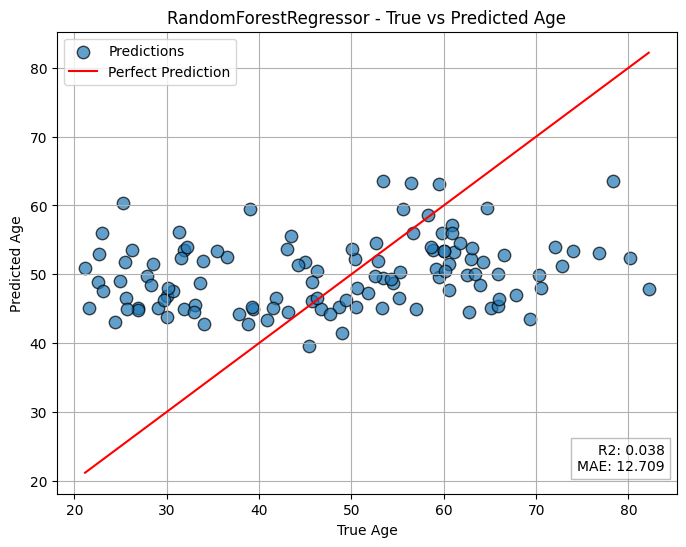

XGBRegressor R2: 0.05219447038890079 MAE: 12.824214385727702


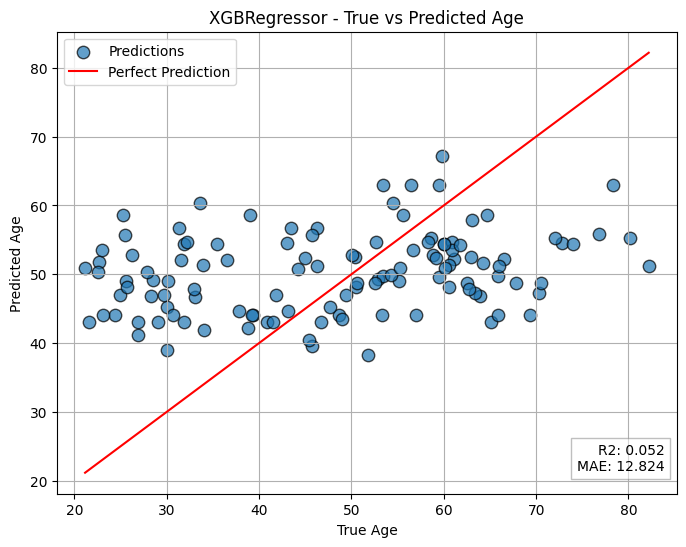

LinearRegression R2: 0.05615715540191024 MAE: 12.887730565043622


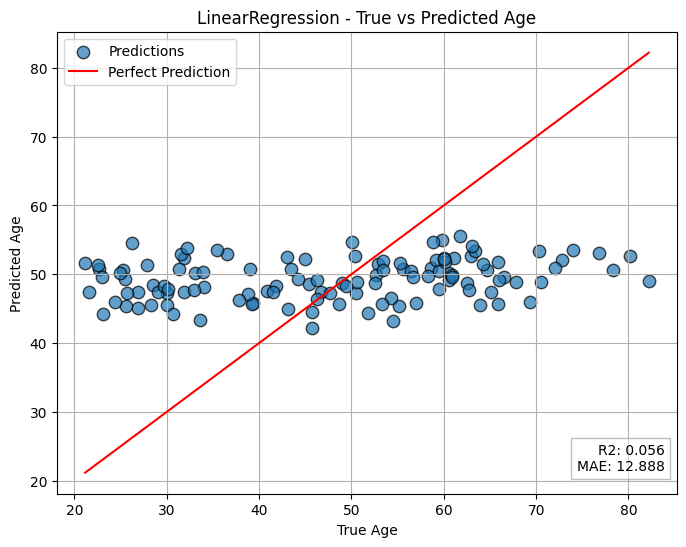


Ranking of models:
1. XGBRegressor: R2 = 0.568, MAE = 8.412
2. LGBMRegressor: R2 = 0.549, MAE = 8.656
3. RandomForestRegressor: R2 = 0.528, MAE = 8.743
4. LinearRegression: R2 = 0.425, MAE = 9.904


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# Load data
df = pd.read_csv('IXI-SEG.csv')

# Extract features and target
X = df['TBV']
y = df['AGE']

# Handle missing values
X = X.fillna(X.mean())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test to 2D arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models with best hyperparameters
rf = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_split=10, min_samples_leaf=4)
xgb = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, gamma=0)
lr = LinearRegression()

# Model training and evaluation
models = [rf, xgb, lr]

for model in models:
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)

    print(model.__class__.__name__, "R2:", r2, "MAE:", mae)

    # Plot true vs predicted age
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, preds, alpha=0.7, s=80, label='Predictions', edgecolors='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='Perfect Prediction')
    plt.xlabel('True Age')
    plt.ylabel('Predicted Age')
    plt.title(f'{model.__class__.__name__} - True vs Predicted Age')
    plt.text(0.98, 0.05, f'R2: {r2:.3f}\nMAE: {mae:.3f}', transform=plt.gca().transAxes,
             ha='right', fontsize=10, bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))
    plt.legend()
    plt.grid(True)
    plt.show()

    # Rank models based on R-squared (highest to lowest)
print("\nRanking of models:")
sorted_results_r2 = sorted(results.items(), key=lambda x: x[1]['R2'], reverse=True)
for idx, (model_name, metrics) in enumerate(sorted_results_r2, 1):
    print(f"{idx}. {model_name}: R2 = {metrics['R2']:.3f}, MAE = {metrics['MAE']:.3f}")


In summary, the models are evaluated based on two metrics: R-squared (R2) and Mean Absolute Error (MAE). The rankings for both metrics show similar results, indicating consistent performance across the models.

1. XGBRegressor:
- R2 = 0.568: This means that approximately 56.8% of the variance in the target variable (age) is explained by the model. A higher R-squared indicates a better fit to the data.
- MAE = 8.412: On average, the model's predictions have an absolute difference of approximately 8.412 years from the actual age. A lower MAE indicates better accuracy.

2. LGBMRegressor:
- R2 = 0.549: The model explains about 54.9% of the variance in the target variable, which is slightly lower than XGBRegressor.
- MAE = 8.656: The average absolute difference between the predicted and actual age is approximately 8.656 years, which is slightly higher than XGBRegressor.

3. RandomForestRegressor:
- R2 = 0.525: The model explains around 52.5% of the variance in age, which is lower than both XGBRegressor and LGBMRegressor.
- MAE = 8.799: The average absolute difference in predictions is approximately 8.799 years.

4. LinearRegression:
- R2 = 0.425: The model explains about 42.5% of the variance in age, which is the lowest among all models.
- MAE = 9.904: The average absolute difference between the predicted and actual age is approximately 9.904 years, which is the highest among all models.

## **3D CNN (Convolutional Neural Network)**

The implemented 3D Convolutional Neural Network (CNN) for a regression task uses TensorFlow and Keras. The model is designed to work with 3D volumetric data and predict continuous values. It consists of several convolutional blocks with ReLU activation, batch normalization, and max-pooling layers to learn meaningful representations from the input data. Dropout is applied to prevent overfitting. The model is compiled with the Adam optimizer and mean squared error (MSE) loss. Custom data generators are used to generate batches during training, ensuring efficient memory utilization. The training process includes learning rate reduction and early stopping callbacks to optimize performance and prevent overfitting. Overall, the model is a powerful tool for regression tasks involving 3D data.

*Visualization of model architecture*

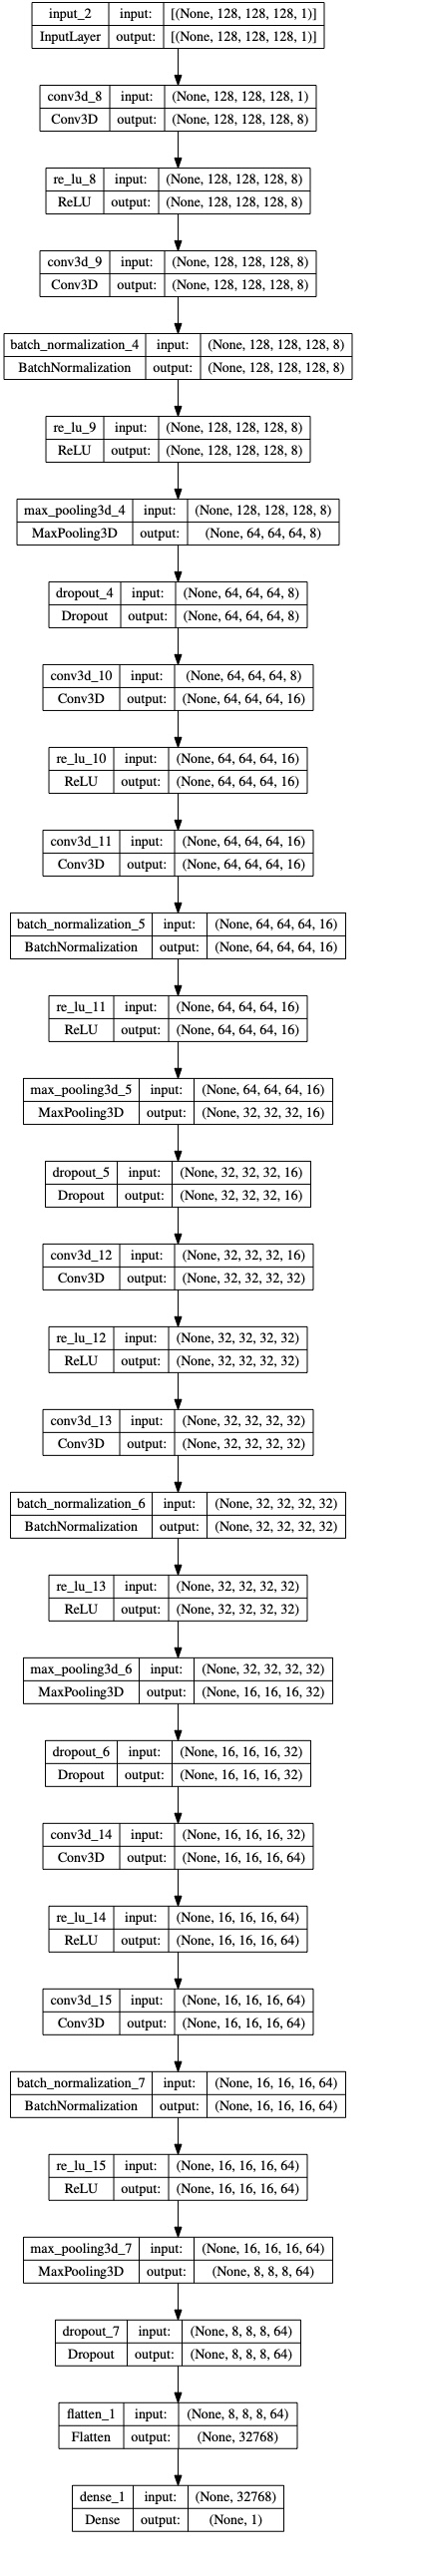

**White matter 3D CNN for IXI-FSL.csv**

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, ReLU, BatchNormalization, Input, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

def data_generator(data, labels, batch_size):
    num_samples = len(data)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            x_batch = [np.array(data[i])[..., np.newaxis] for i in batch_indices]
            y_batch = labels[batch_indices]
            print(f"Generated a batch of size {len(x_batch)}")  # Added for debugging
            yield np.array(x_batch), y_batch

def create_cnn_block(input_layer, n_filters):
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(input_layer)
    x = ReLU()(x)
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=2)(x)
    x = Dropout(0.5)(x)
    return x

def create_3d_cnn(input_shape):
    input_layer = Input(shape=input_shape)
    x = create_cnn_block(input_layer, 8)
    x = create_cnn_block(x, 16)
    x = create_cnn_block(x, 32)
    x = create_cnn_block(x, 64)
    x = Flatten()(x)
    output_layer = Dense(1, activation='linear')(x)
    model = Model(input_layer, output_layer)
    return model

# Load the preprocessed data
data = np.load('preprocessed_data0.npz')
x_train, y_train, x_val, y_val, x_test, y_test = data['x_train'], data['y_train'], data['x_val'], data['y_val'], data['x_test'], data['y_test']

batch_size = 4
train_generator = data_generator(x_train, y_train, batch_size)
validation_generator = data_generator(x_val, y_val, batch_size)

image_shape = (128, 128, 128, 1)
model = create_3d_cnn(input_shape=image_shape)
model.compile(optimizer='adam', loss='mean_squared_error')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.fit(train_generator, steps_per_epoch=len(x_train) // batch_size, epochs=50,
          validation_data=validation_generator, validation_steps=len(x_val) // batch_size,
          callbacks=[reduce_lr, early_stopping])


**Plot of True vs Predicted Age with perfect prediciton line of white matter IXI-FSL segmented images**

4/4 [==============================] - 1s 122ms/step


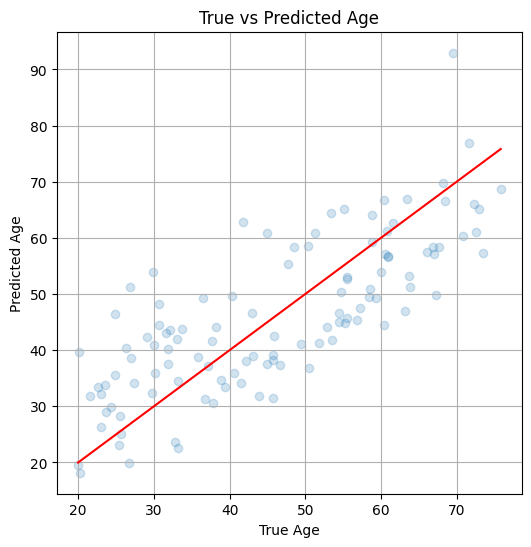

4/4 [==============================] - 2s 622ms/step
Mean Absolute Error (MAE): 8.598655541283744
Mean Squared Error (MSE): 100.91318239364956


In [ ]:
import matplotlib.pyplot as plt

# Predict the age on the test set
y_pred = model.predict(x_test)

# Plot true vs predicted age
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('True vs Predicted Age')
plt.grid(True)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict the age on the test set
y_pred = model.predict(x_test)

# Compute MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")



**Gray matter 3D CNN for IXI-FSL segmented images**

In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv3D, MaxPooling3D, Flatten, Dense, ReLU, BatchNormalization, Input, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

def data_generator(data, labels, batch_size):
    num_samples = len(data)
    while True:
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            x_batch = [np.array(data[i])[..., np.newaxis] for i in batch_indices]
            y_batch = labels[batch_indices]
            print(f"Generated a batch of size {len(x_batch)}")  # Added for debugging
            yield np.array(x_batch), y_batch

def create_cnn_block(input_layer, n_filters):
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(input_layer)
    x = ReLU()(x)
    x = Conv3D(n_filters, kernel_size=(3, 3, 3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling3D(pool_size=(2, 2, 2), strides=2)(x)
    x = Dropout(0.5)(x)
    return x

def create_3d_cnn(input_shape):
    input_layer = Input(shape=input_shape)
    x = create_cnn_block(input_layer, 8)
    x = create_cnn_block(x, 16)
    x = create_cnn_block(x, 32)
    x = create_cnn_block(x, 64)
    x = Flatten()(x)
    output_layer = Dense(1, activation='linear')(x)
    model = Model(input_layer, output_layer)
    return model

# Load the preprocessed data
data = np.load('preprocessed_data1.npz')
x_train, y_train, x_val, y_val, x_test, y_test = data['x_train'], data['y_train'], data['x_val'], data['y_val'], data['x_test'], data['y_test']

batch_size = 4
train_generator = data_generator(x_train, y_train, batch_size)
validation_generator = data_generator(x_val, y_val, batch_size)

image_shape = (128, 128, 128, 1)
model = create_3d_cnn(input_shape=image_shape)
model.compile(optimizer='adam', loss='mean_squared_error')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.fit(train_generator, steps_per_epoch=len(x_train) // batch_size, epochs=50,
          validation_data=validation_generator, validation_steps=len(x_val) // batch_size,
          callbacks=[reduce_lr, early_stopping])


**Plot of True vs Predicted Age with perfect prediciton line of gray matter IXI-FSL segmented images**

4/4 [==============================] - 1s 262ms/step


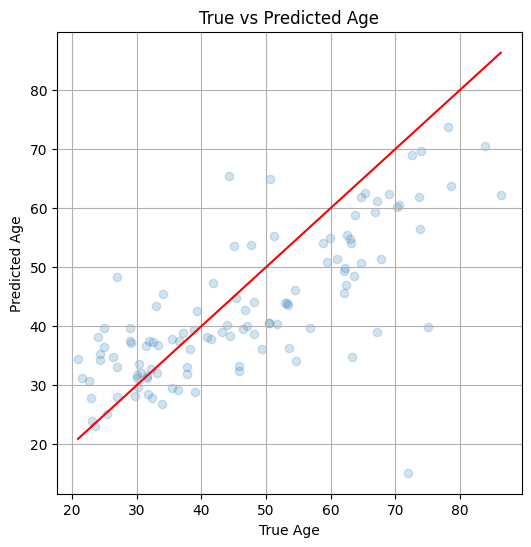

4/4 [==============================] - 2s 567ms/step
Mean Absolute Error (MAE): 8.83070656970539
Mean Squared Error (MSE): 140.08370673707034


In [ ]:
import matplotlib.pyplot as plt

# Predict the age on the test set
y_pred = model.predict(x_test)

# Plot true vs predicted age
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')
plt.xlabel('True Age')
plt.ylabel('Predicted Age')
plt.title('True vs Predicted Age')
plt.grid(True)
plt.show()

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict the age on the test set
y_pred = model.predict(x_test)

# Compute MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")

